In [168]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import librosa
from numpy.fft import fft, fftshift

In [169]:
# Function for computing speech spectrogram
def speech_spectro(samp_freq,sound):
    #computing the frame size for 25ms
    frame_size=int(samp_freq*(.025))
    #computing hop size for 10ms
    hop=int(samp_freq*(.01))
    #mark the frames
    samples=range(0,len(sound),hop)
    mag_point=256
    size=int(mag_point/2)
    space=[]


    j=0
    #computing fft on each frames and storing
    for i in samples:

        if len(sound[i:]>=frame_size):
            space.append(np.log(np.abs(np.fft.fft(sound[i:i+frame_size],mag_point)))[:128])
        else:
            #padding 0 where the remaining size is not equal to frame size
            padding=np.zeros((frame_size,),dtype='float')
            padding[i:]=sound[i:]
            space.append(np.log(np.abs(np.fft.fft(padding[i:i+frame_size],mag_point)))[:128])
        j+=1
        
        
    return space
  
    

In [170]:
#functions for computing whitening
def whitenned(data, noisy):
    mean_data=data.mean(0)
    std_data=data-mean_data
    M=np.dot(std_data,std_data.T)
    v,w=np.linalg.eigh(M)
# computing whitening transform
    v_=[1/np.sqrt(v[i]) for i in range(len(v))]
    lamda_matrix=np.zeros((128,128))
    for i in range((len(v))):
        lamda_matrix[i,i]=v_[i]
    lamda_matrix
    A=np.dot(lamda_matrix,(np.transpose(w)))
    #applying whitening transform on clean audio
    white_clean=np.dot(A,std_data)
    #applying whitening transform on noisy audio
    white_noisy=np.dot(A,noisy-mean_data)
    
    return white_clean, white_noisy

In [171]:
#computing nondiagonal average values
def nondiagonal(data):
    data=np.absolute(data)
    n=data.shape[0]
    for i in range(n):
        data[i,i]=0
    avg=(np.sum(data))/(n*n-n)
    return avg

In [172]:
#Loading Speech data for clean and noisy
folder=os.getcwd()
audio1_path=folder+'/speechFiles/clean.wav'
sound, samp_freq=librosa.load(audio1_path)
audio2_path=folder+'/speechFiles/noisy.wav'
sound2,samp_freq2=librosa.load(audio2_path)
clean=speech_spectro(samp_freq,sound)
noisy=speech_spectro(samp_freq2,sound2)




In [173]:
clean=np.array(clean).T
noisy=np.array(noisy).T

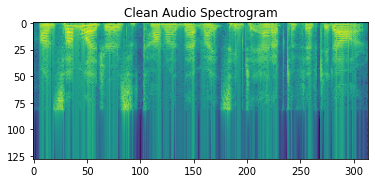

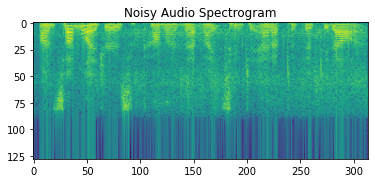

In [174]:
plt.figure()
plt.imshow(clean)
plt.title("Clean Audio Spectrogram")
plt.show()
plt.figure()
plt.imshow(noisy)
plt.title("Noisy Audio Spectrogram")
plt.show()

In [175]:

white_clean, white_noisy=whitenned(clean,noisy)
#Computing covarience
clean_cov=np.dot(white_clean, white_clean.T)
noisy_cov=np.dot(white_noisy, white_noisy.T)
#computing no
avg_clean=nondiagonal(clean_cov)
avg_noisy=nondiagonal(noisy_cov)


In [176]:
print("the average for white_clean:", avg_clean)
print("the average for white_noisy:", avg_noisy)
#The Value for the noise data is very high.

the average for white_clean: 5.715922859279543e-06
the average for white_noisy: 229254051.72194707


In [177]:
white_noisy, white_clean=whitenned(noisy,clean)

clean_cov=np.dot(white_clean, white_clean.T)
noisy_cov=np.dot(white_noisy, white_noisy.T)
avg_clean=nondiagonal(clean_cov)
avg_noisy=nondiagonal(noisy_cov)
print("the average for white_clean:", avg_clean)
print("the average for white_noisy:", avg_noisy) 
# The average value is high for clean data.

the average for white_clean: 223125796.2396102
the average for white_noisy: 5.32796741072419e-06


(128, 313)

(128, 128)

(128, 128)

array([[0.0104399 , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.01884084, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.03944884, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 2.44457696, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 3.2442538 ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        3.47574269]])

array([[-1.53471081e-02, -1.10947883e-02, -1.05575612e-02, ...,
        -1.27437100e-02, -9.86939206e-03, -7.37741787e-03],
       [-3.08935092e-02, -3.19254675e-02, -2.70453289e-02, ...,
        -2.25965691e-02, -2.48645318e-02, -3.40157433e-02],
       [ 9.30960354e-03,  2.97885052e-03,  1.45451319e-03, ...,
        -6.57668653e-03,  3.58205489e-03, -1.68033704e-03],
       ...,
       [-1.93264584e+00,  1.22115528e+00, -2.94825747e+00, ...,
        -4.02755131e-01, -1.36814970e+00, -2.44126912e-01],
       [ 6.94268917e+00,  6.04539682e+00,  6.95968882e+00, ...,
         4.80882338e+00,  2.85291854e+00,  3.46846823e+00],
       [ 6.48898556e-01, -9.25194305e-01, -1.34079934e-01, ...,
         5.13028398e-01,  3.44779278e-01, -1.20089601e-01]])